# Breast cancer neural networks

antes de tudo, precisamos baixar as bases de dados

In [2]:
!wget "https://att-c.udemycdn.com/2018-06-05_15-16-04-5dc8274288bd5c86f5c3321b505da9d3/original.csv?response-content-disposition=attachment%3B+filename%3Dentradas_breast.csv&Expires=1660719804&Signature=DIlGx5NapCH-RLxIXolmbfp0oiHHiPjvQkWsniBKYukaRmxdeJEZ81ZhCBRbQsNPssaQHhz4yqKEeO1AVUg1QgWUcbt8A6h~BC8YKGJdnfoUstwwxnrRNY1y-7~nPsVeFS3k83X-LBK5Fj6b8CJ0OlIy8XnguYwsr3P-47iOcEJ25Es9GNRk66YiElxr7B6Sd-o66rxbkrhBFOlJlhkLI2aDIVWXxuHQa-RgPhs7KJUAAOuiuP~gCnsQw9LnO7JkDWRj928Sj-vpLFoOieBYbuEBVONZdXLp6g2aP8dIfYeW4LReUxmO3adbnlxcVNaUCE-DLIYw7a10y0YfB1thsg__&Key-Pair-Id=APKAITJV77WS5ZT7262A" -O entradas_breast.csv
!wget "https://att-c.udemycdn.com/2018-06-05_15-16-17-e799a030a477b8c240a6320c6b0dee0f/original.csv?response-content-disposition=attachment%3B+filename%3Dsaidas_breast.csv&Expires=1660720432&Signature=jnZAbgMejq9PCtwDSivOzAWME6aHnnJInJonVTfICm35tGU7YmaQB1~1WcADf2TGmY3yiFloRVaQCzrc3XzSkuRQ32QtOQq4kt1Z9TrKLXOE1GSKSkcEMQeJKeiF7QWh5Rys3Go7q1M3eMBixkHQYsMs3DCfh~NOaPkjCa8yAOM93Vhy1rUD~qxBnT~rC4Pw3ez4FQHFE10eqqA3pw1XnHGGZULtO7XdPIT7WN8ZoqIosQZrewKRTXmDgr6hF7UrKZBUKsdPiBHT3z-JiHnXpKqWn1ARxWJLaV~5tXkisimJZVOkVgJjsmpdh8ygxZa5yi0AMQZii8MmTnglJWIvcA__&Key-Pair-Id=APKAITJV77WS5ZT7262A" -O saidas_breast.csv

--2022-08-19 22:41:56--  https://att-c.udemycdn.com/2018-06-05_15-16-04-5dc8274288bd5c86f5c3321b505da9d3/original.csv?response-content-disposition=attachment%3B+filename%3Dentradas_breast.csv&Expires=1660719804&Signature=DIlGx5NapCH-RLxIXolmbfp0oiHHiPjvQkWsniBKYukaRmxdeJEZ81ZhCBRbQsNPssaQHhz4yqKEeO1AVUg1QgWUcbt8A6h~BC8YKGJdnfoUstwwxnrRNY1y-7~nPsVeFS3k83X-LBK5Fj6b8CJ0OlIy8XnguYwsr3P-47iOcEJ25Es9GNRk66YiElxr7B6Sd-o66rxbkrhBFOlJlhkLI2aDIVWXxuHQa-RgPhs7KJUAAOuiuP~gCnsQw9LnO7JkDWRj928Sj-vpLFoOieBYbuEBVONZdXLp6g2aP8dIfYeW4LReUxmO3adbnlxcVNaUCE-DLIYw7a10y0YfB1thsg__&Key-Pair-Id=APKAITJV77WS5ZT7262A
Resolving att-c.udemycdn.com (att-c.udemycdn.com)... 2600:9000:20fa:c000:15:a3c5:ea00:93a1, 2600:9000:20fa:3000:15:a3c5:ea00:93a1, 2600:9000:20fa:3c00:15:a3c5:ea00:93a1, ...
Connecting to att-c.udemycdn.com (att-c.udemycdn.com)|2600:9000:20fa:c000:15:a3c5:ea00:93a1|:443... connected.
HTTP request sent, awaiting response... 403 Forbidden
2022-08-19 22:41:56 ERROR 403: Forbidden.

--2022-08-19 22:41:

# Primeiro passo

importar os dados contidos no csv utilizando o pacote pandas

In [5]:
import pandas as pd

previsores_df = pd.read_csv("entradas_breast.csv")
classes_df    = pd.read_csv("saidas_breast.csv")


# Segundo passo

separar os dados resgatados do csv em treino e teste

In [6]:
from sklearn.model_selection import train_test_split

previsores_treino, previsores_teste, classes_treino, classes_teste = train_test_split(previsores_df,
                                                                                      classes_df,
                                                                                      test_size=0.25)

# Terceiro passo

Iniciar a rede neural, neste caso estamos usando a camada Densa, logo teremos uma rede neural totalmente conectada (fully connected), onde cada perceptron se liga com todos os outros da próxima camada

## Parâmetros

- units: número de neurônios na camada oculta
- activation: função de ativação que será usada
- kernel_initializer: como os pesos serão iniciados
- input_dim(input dimension): quantos elementos existem na camada de entrada

In [13]:
from keras.models import Sequential
from keras.layers import Dense

num_elementos = len(previsores_df.columns)
num_neuronios = round((num_elementos + 1)/2)

classificador = Sequential()

camada_dos_atributos = Dense(units=num_neuronios,
                        activation="relu",
                        kernel_initializer="random_uniform",
                        input_dim=num_elementos)

camada_dos_atributos2 = Dense(units=num_neuronios,
                        activation="relu",
                        kernel_initializer="random_uniform",
                        input_dim=num_elementos)

"""
Como a resposta é apenas se o câncer é benigno ou maligno, temos apenas
um neurônio nessa camada. Além disso, como queremos uma de 0 ou 1, então
utilizamos a função sigmoid, que irá gerar um número entre 0 e 1, logo
nos dizendo a probabilidade do tipo de cancer
"""
camada_de_respostas = Dense(units=1,
                            activation="sigmoid")

classificador.add(camada_dos_atributos)
classificador.add(camada_dos_atributos2)
classificador.add(camada_de_respostas)

# Quarto passo

Agora que criamos a rede neural, precisamos também configurar o modelo da mesma

- optimizer: qual algoritmo vai otimizar os pesos da rede neural
- loss: também chamada de função de pontuação de otimização, serve para calcular o erro da rede neural
- metrics: as métricas para fazer a avaliação da rede neural

In [14]:
from keras.optimizers import Adam 

optimizer = Adam(learning_rate=0.001, beta_1=0.0001, beta_2=0.5)

classificador.compile(optimizer=optimizer,
                      loss="binary_crossentropy",
                      metrics=["binary_accuracy"]
                      )

# Quinto passo

Treinar a rede neural, nesta fase iremos alimentar a rede neural com informação, que a mesma terá tentar encontrar uma co-relação

- primeiro argumento: previsores que serão usados para treino
- segundo argumento:  resposta para os previsores
- batch_size: quantos registros a rede neural irá treinar a cada rodada, antes de atualizar os pesos
- epochs: quantas vezes o ajuste do peso será feito

In [15]:
#Treino e teste
classificador.fit(previsores_treino,
                  classes_treino, 
                  batch_size=10, 
                  epochs=100)

Epoch 1/100
43/43 [==============================] - 1s 3ms/step - loss: 0.9659 - binary_accuracy: 0.5962
Epoch 2/100
43/43 [==============================] - 0s 2ms/step - loss: 0.6191 - binary_accuracy: 0.6948
Epoch 3/100
43/43 [==============================] - 0s 2ms/step - loss: 0.5113 - binary_accuracy: 0.7394
Epoch 4/100
43/43 [==============================] - 0s 3ms/step - loss: 0.4583 - binary_accuracy: 0.7535
Epoch 5/100
43/43 [==============================] - 0s 3ms/step - loss: 0.4691 - binary_accuracy: 0.7746
Epoch 6/100
43/43 [==============================] - 0s 2ms/step - loss: 0.4432 - binary_accuracy: 0.8075
Epoch 7/100
43/43 [==============================] - 0s 2ms/step - loss: 0.4800 - binary_accuracy: 0.7934
Epoch 8/100
43/43 [==============================] - 0s 3ms/step - loss: 0.4652 - binary_accuracy: 0.8192
Epoch 9/100
43/43 [==============================] - 0s 2ms/step - loss: 0.4354 - binary_accuracy: 0.8146
Epoch 10/100
43/43 [==========================

In [16]:
previsoes = classificador.predict(previsores_teste)

previsoes = (previsoes > 0.5)
print(previsoes)

5/5 [==============================] - 0s 2ms/step
[[ True]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [Fa

# Sexto passo

Por fim, vamos então classificar a acurácia do modelo

5/5 [==============================] - 0s 3ms/step - loss: 1.3177 - binary_accuracy: 0.8881


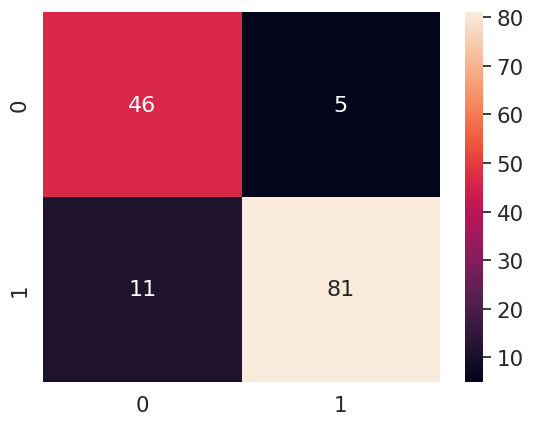

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sn

precisao_scikit = accuracy_score(classes_teste, previsoes)
matriz   = confusion_matrix(classes_teste,previsoes)

previsao_keras = classificador.evaluate(previsores_teste,classes_teste)

df_prev = pd.DataFrame(matriz,range(2),range(2))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_prev, annot=True, annot_kws={"size": 16}) # font size

plt.show()
